![Astrofisica Computacional](../../../logo.PNG)

---
## 02. The Problem with Over-Fitting of Decision Trees.


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we illustrate the problem with over-fitting a decision tree.

---

Data over-fit refers to an algorithm that tries to incorporate and to adjust the model to all the points in the dataset (even outliers!). Over-fitting involves a losing in the general prediction power of the model.


### The dataset

We will use again the datafile `'sdss_galaxy_colors.npy'`with photometric data of galaxies.


In [1]:
import numpy as np

data = np.load('sdss_galaxy_colors.npy')
data

array([(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301  , 6.543622e-05),
       (19.86318, 18.66298, 17.84272, 17.38978, 17.14313, b'GALAXY', 0.1645703 , 1.186625e-05),
       (19.97362, 18.31421, 17.47922, 17.0744 , 16.76174, b'GALAXY', 0.04190006, 2.183788e-05),
       ...,
       (19.82667, 18.10038, 17.16133, 16.5796 , 16.19755, b'GALAXY', 0.0784592 , 2.159406e-05),
       (19.98672, 19.75385, 19.5713 , 19.27739, 19.25895, b'QSO', 1.567295  , 4.505933e-04),
       (18.00024, 17.80957, 17.77302, 17.72663, 17.7264 , b'QSO', 0.4749449 , 6.203324e-05)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('spec_class', 'S6'), ('redshift', '<f8'), ('redshift_err', '<f8')])

The features in this dataset are: 

| dtype | Feature|
|:-:|:-:|
|`u` |u band filter|
|`g` |g band filter|
|`r` |r band filter|
|`i` |i band filter|
|`z` |z band filter|
|`spec_class` |spectral class|
|`redshift` |redshift|
|`redshift_err` |redshift error|


The size of the dataset is

In [2]:
n = data.size
n

50000

---
### Training the Decision Tree

As stressed in the last lesson, decision trees hve advantages such as

- They are easy to implement
- They are easy to interpret
- Data requires little preparation
- Usually, decision trees are computational efficient

However, decision trees also have some disadvantages and limitations. The most important is that they usually over-fit the data if there is no supervision during the training process. Hence, the over-fit will produce a super-complicated tree that tries to reproduce all and every one of the targets.


In order to train the decision tree, we define the 'features' and 'targets' sets.

In [3]:
features = np.asarray([data['u']-data['g'],\
                       data['g']-data['i'],\
                       data['r']-data['i'],\
                       data['i']-data['z'] ])
features = features.T

targets = np.asarray(data['redshift'])

Now, we will split the data into train and test subsets (we will use a 50:50 split),

In [6]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, random_state=60, test_size=0.2)


In order to show the over-fit problem, we will change the tree depth option of the decision tree. It is common to think that a bigger depth will produce a better precision in the predictions. However, a big depth will produce the over-fit of the training data and it implies a lower precision when predicting for the test subset.

Consider tree depths in the range from 1 to 40 and an evaluation of the model based on the median of the residuals,

\begin{equation}
\text{eval_dec_tree} = \text{median}\left\lbrace \left| \text{predictions}_i - \text{targets}_i \right|\right\rbrace
\end{equation}

Then, we have


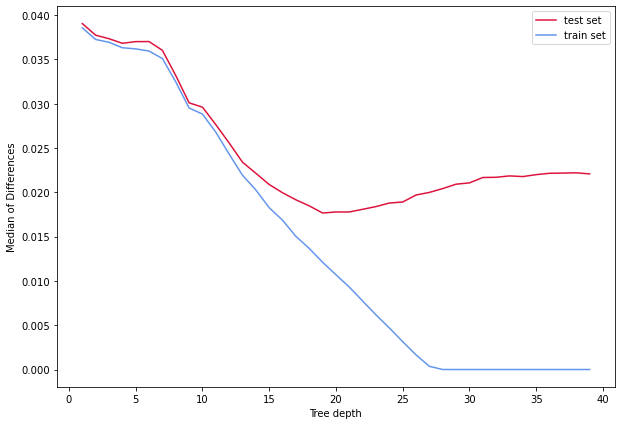

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

t_depth = range(1,40)
eval_test = np.zeros(len(t_depth))
eval_train = np.zeros(len(t_depth))

for i in range(len(t_depth)):
    d_tree = DecisionTreeRegressor(max_depth=t_depth[i])
    d_tree.fit(train_features, train_targets)
    predictions_d_tree = d_tree.predict(test_features)
    eval_test[i] = np.median(np.abs(predictions_d_tree - test_targets))
    predictions_d_tree = d_tree.predict(train_features)
    eval_train[i] = np.median(np.abs(predictions_d_tree - train_targets))


plt.figure(figsize=(10,7))
plt.plot(t_depth, eval_test, color='crimson', label='test set')
plt.plot(t_depth, eval_train,color='cornflowerblue', label='train set')
plt.xlabel(r'Tree depth')
plt.ylabel(r'Median of Differences')
plt.legend()
plt.show()

This plot shows that the precision of the predictions on the train set is better when increasing the tree depth, producing a perfect prediction (i.e. zero error) for tree depths greater than 25.

On the other hand, the precision on the test set initially improves by increasing the depth. However, around a depth of 19 the error grows again due to the overfit of the training data. According to the plot, a depth around 19 or 20 is the best to obtain a good prediction for the test data.